# The game of life

I first read about the game of life in the ''The grand design'' by Stephen Hawking, a book which had some of the most beautiful, colorful diagrams i've seen, and i remember thinking it would be so great if i could program that kind of stuff. I knew nothing about programming back then, since i was probably in high school, but now i realize it shouldn't be two hard to do it, so i will try to implement it here. 

Hopefully this will turn into some kind of series where i implement systems that are nothing new really, but are interesting to me in some way. I'm sure there are thousands of simulations of this things out there, but somehow i feel that you get a deeper connection with a problem when you can emulate it by yourself, it's like now it has become a part of you, you've conquered the demon and it will be your decision whether to stay poking it with its own trident or whether you will go on to tame a bigger one. 

This notebooks will also contain an incredible ammount of irrelevant information about me, because i plan to write them as some sort of programming journal. So if you're not up for some boring bullshit you probably shouldn't read them. 

Inspiration to write this series comes mainly from the fact that i'll be 27 soon and everyone knows this is a dangerous age, so, before getting recruited by the club you might want to have all your shit in order, and that includes stupid programming problems which you once thought about solving but then you came across some new series to watch and you completely forgot about it. I probably should be focusing on more concerning things but this is something i can actually do something about.  

## So what is the game of life?

The game of life consists in an infinite world where each point could either be an alive cell or a dead cell, a very accurate depiction of the real world in summary. And the evolution of every point in the world is given by two rules:

* If a live cell is touching 2 or 3 live cells (''called neighbors''), then it remains alive next generation, otherwise it dies
* If a non-living cell is touching exactly 3 live cells, it comes to life next generation.

## Classes 

In [1]:
import numpy as np
#The cell class
class Cell:
    def __init__(self, alive):
        self.alive = alive
            
    def setAlive(self,alive):
        self.alive = alive
    def getAlive(self):
        return self.alive
        

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors
class World:
    '''
    So, the world in principle should be infinite, but of course computers can't do that so we will use a torus, 
    sort of what happens in pacman, when the world runs out you continue on the other side. 
    '''
    #The time step will be zero initially
    t = 0
    
    #The constructor
    def __init__(self,booleanGrid):
        
        #Store the width and the height of the world
        [height,width] = booleanGrid.shape
        self.width = width
        self.height = height
        print(height)
        print(width)
        
        #Create an array of the size 
        self.worldMatrix = np.full((height, width), Cell(False))
        #Check if the dimensions of the boolean grid are valid
        
        for i in range(0,height):
            for j in range(0,width):
                #Fill the point with a new cell
                self.worldMatrix[i][j] = Cell(booleanGrid[i][j])
        
        #The color map we will use
        self.cMap = matplotlib.colors.ListedColormap(['black','lime'])
        
        #Vectorized function of the get alive 
        self.vectorFunc = np.vectorize(Cell.getAlive)
        
    def advance(self):
        self.t+=1
        newMatrix = np.copy(self.worldMatrix)
        for i in range(0,self.height):
            for j in range(0,self.width):
                #Get the neighbors
                neighbors = np.full((3, 3), Cell(False))
                #Collect the neighbors we are using the modulus
                #to make the world toroidal
                neighbors[0][0] = self.worldMatrix[(i-1) % self.height][(j-1) % self.width]
                neighbors[0][1] = self.worldMatrix[(i-1) % self.height][j] 
                neighbors[0][2] = self.worldMatrix[(i-1) % self.height][(j+1) % self.width] 
                neighbors[1][0] = self.worldMatrix[i][(j-1) % self.width] 
                neighbors[1][1] = self.worldMatrix[i][j] 
                neighbors[1][2] = self.worldMatrix[i][(j+1) % self.width] 
                neighbors[2][0] = self.worldMatrix[(i+1) % self.height][(j-1) % self.width] 
                neighbors[2][1] = self.worldMatrix[(i+1) % self.height][j]
                neighbors[2][2] = self.worldMatrix[(i+1) % self.height][(j+1) % self.width] 
                
                #Evolve the cell
                newMatrix[i][j] = Cell(self.processNeighbors(neighbors))
        self.worldMatrix = np.copy(newMatrix)
                
    def processNeighbors(self,neighbors):
        n,m = neighbors.shape
        aliveSum = 0
        cell = neighbors[1][1]
        aliveDecision = False
        for i in range(0,n):
            for j in range(0,m):
                if(i != 1 or j != 1):
                    if(neighbors[i][j].alive == True):
                        aliveSum += 1
        
        if(cell.alive == True and (aliveSum == 2 or aliveSum == 3)):
            aliveDecision = True
        if(cell.alive == False and aliveSum == 3):
            aliveDecision = True
        return aliveDecision
                    
    def convertCellsToVals(self):
        return self.vectorFunc(self.worldMatrix)
        
    #We will use matplotlib
    def drawWorld(self,ax):
        quad = ax.pcolor(self.convertCellsToVals(),cmap = self.cMap, edgecolors='lightgrey', linewidths=1)
        return quad
        
        

In [3]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

class LifeSimulator:
    
    def __init__(self,booleanGrid):
        self.world = World(booleanGrid)
        self.fig = plt.figure()
        self.ax = plt.axes()
        self.quad = self.world.drawWorld(self.ax)
        
        
    def init(self):
        self.quad.set_array([])
        return self.quad
        
    def animate(self,i):
        self.world.advance()
        self.quad.set_array(self.world.convertCellsToVals().ravel())
        return self.quad
        
    def simulate(self,steps,name):
        anim = FuncAnimation(self.fig,self.animate,frames=steps,init_func=self.init,interval=200,blit=False)
        anim.save(name+'.gif', writer='imagemagick')
        print("Finished exporting")
    

# Some static tests

25
25


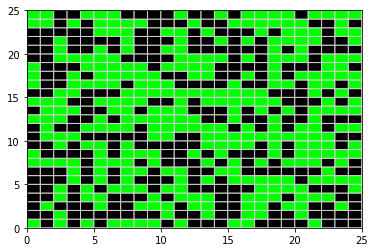

In [4]:
grid = np.random.randint(2, size=(25,25))

world = World(grid)
plt.figure()
ax = plt.axes()
world.drawWorld(ax)
plt.show()

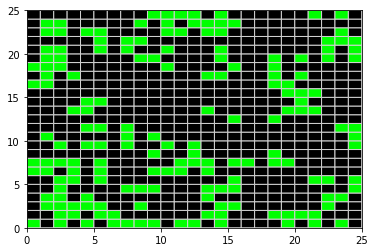

In [5]:
world.advance()
f = plt.figure()
ax = plt.axes()
world.drawWorld(ax)
plt.show()

# Export animation

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


25
25
Finished exporting


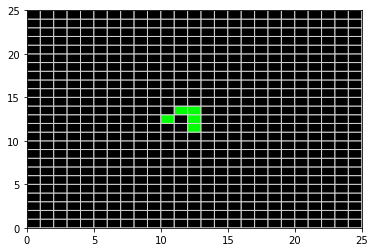

In [7]:
#Alternating cross
grid = np.zeros((25,25))
grid[12,12] = 1
grid[11,12] = 1
grid[13,12] = 1
grid[13,11] = 1
grid[12,10] = 1
simulator = LifeSimulator(grid)
simulator.simulate(200,'gif_life_moving')


0

True

In [164]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


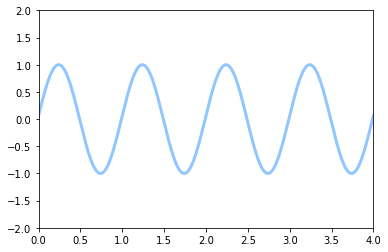

In [240]:
a = [[2,3],[4,5]]
b = np.copy(a)
a[1][1] = 4 
print(b[1][1])
print(a)

5
[[2, 3], [4, 4]]
